In [1]:
import math
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# renvoie le quotient et le reste de la division euclidienne de a par b
def diveucl(a,b):
    r=a
    q=0
    while r>b-1:
        q=q+1
        r=r-b
    return [q,r] 

In [3]:
#détermine le plus petit diviseur premier de n
def mindiv(n): 
    r=2
    while r <= math.sqrt(n): 
        if n%r!=0: # si r ne divise par n on augmente r de 1
            r=r+1
        else: # sinon cela signifie que r est le premier recherché
            return r
    return n    
    



In [4]:
print(mindiv(27))
print(mindiv(29))

3
29


In [5]:
#fournit la liste des diviseurs premiers de n, avec multiplicité et par ordre croissant
def decompo(n): 
    d=[] # liste des diviseurs premiers
    a=n
    while a>1:
        d=d+[mindiv(a)] # on ajoute le plus petit diviseur premier de a à la liste d
        a= a//d[-1]  # on divise a par p (élément d'indice "-1" de la liste d) et on recommence jusqu'à atteindre a=1
    return d   

In [6]:
decompo(27)

[3, 3, 3]

In [7]:
def produitliste(c):
    p=1
    for i in range(len(c)): # i va de 0 à la (longueur de c) -1
        p=p*c[i]
    return p    

In [8]:
print(decompo(14234))
produitliste(decompo(14234))

[2, 11, 647]


14234

In [9]:
#fournit une liste de n premiers nombres (question e))
def premiereuclide(n): 
    d=[2]
    while len(d)<n:
        N=produitliste(d)+1 #N contient un facteur premier qui n'est pas dans la liste d
        d=d+[mindiv(N)] #on ajoute à la liste le plus petit facteur premier de N
    return d  

In [10]:
premiereuclide(8)

[2, 3, 7, 43, 13, 53, 5, 6221671]

In [11]:
def crible(n):
    L=list(range(n+1))
    L[1]=0
    
    for p in range(2,n+1):
        for i in range(2*p,n+1,p):
            L[i]=0  
    return L

In [12]:
crible(15)

[0, 0, 2, 3, 0, 5, 0, 7, 0, 0, 0, 11, 0, 13, 0, 0]

In [17]:
# Mesurons le temps que prend l'algorithme
start=time.time()

crible(20000000)

end=time.time()
duree=end-start
print(duree)

42.075817584991455


In [19]:
# On optimise un peu l'algo précédent à deux endroits
# renvoie une liste c de longueur n+1 telle que c[k] = k si k est premier et 0 sinon
def crible2(n):
    d=list(range(n+1)) # d est la liste des entiers entre 0 et n
    if n > 0: # 1 n'est pas premier
        d[1]=0
    r=2 #on initialise à p=2
    while r<math.sqrt(n)+1: # on peut arrêter le crible dès qu'on est plus grand que racine de n (1ère optimisation)
        if d[r]!=0: # on vérifie que le d[r] n'a pas déjà été supprimé (2ème optimisation)
            for i in range(r*r,n+1,r): #on "supprime" les multiples de r (en commençant à r^2) en mettant leur valeur à 0
                d[i]=0
        r=r+1   
    return d

In [20]:
crible2(12)

[0, 0, 2, 3, 0, 5, 0, 7, 0, 0, 0, 11, 0]

In [21]:
# Mesurons le temps pris par le 2ème algo
start=time.time()

crible2(20000000)

end=time.time()
duree=end-start
print(duree)

4.719168186187744


In [22]:
# L = liste d'entiers. On supprime de L tous les multiples de p
def supprMult(p,L):
    for i in L:
        if i%p == 0:
            L.remove(i)
    return L

In [23]:
# renvoie la liste des premiers <= n en utilisant le crible d'Eratosthène récursif (sur une liste)
def cribleRecListe(L):
    if len(L) == 1 or L[0] > L[-1]^2:
        return L
    else:
        return [L[0]]+cribleRecListe(supprMult(L[0],L))

In [24]:
# crible récursif à partir d'un entier n (et en utilisant l'algo précédent)
def cribleRec(n):
    if n > 1:
        return cribleRecListe(list(range(2,n+1)))
    else:
        return []

In [25]:
cribleRec(40)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]

In [30]:
# renvoie pi(n)
def PiIteratif(n):
    c=crible2(n)
    return len(c) - c.count(0)  # on compte tous les nombres premiers (c'est-à-dire le nombres de valeurs non nulles dans le tableau renvoyé par crible1)

In [31]:
# codage en récursif (fonction intermédiaire qui travaille sur les listes)
def PiRecListe(L):
    # si L[0]² est plus grand que le dernier élément de L il ne reste que des nombres premiers
    if len(L) == 1 or L[0]**2 > L[-1]: # on initialise (L[-1] = dernier élément de L)
        return len(L)
    else:
        return 1+PiRecListe(supprMult(L[0],L))

In [32]:
# pi(n) en récursif en utilisant l'algo précédent
def PiRecursif(n):
    if n > 1:
        return PiRecListe(list(range(2,n+1)))
    else:
        return 0

In [33]:
for n in range(12):
    print(PiIteratif(n),PiRecursif(n))

0 0
0 0
1 1
2 2
2 2
3 3
3 3
4 4
4 4
4 4
4 4
5 5


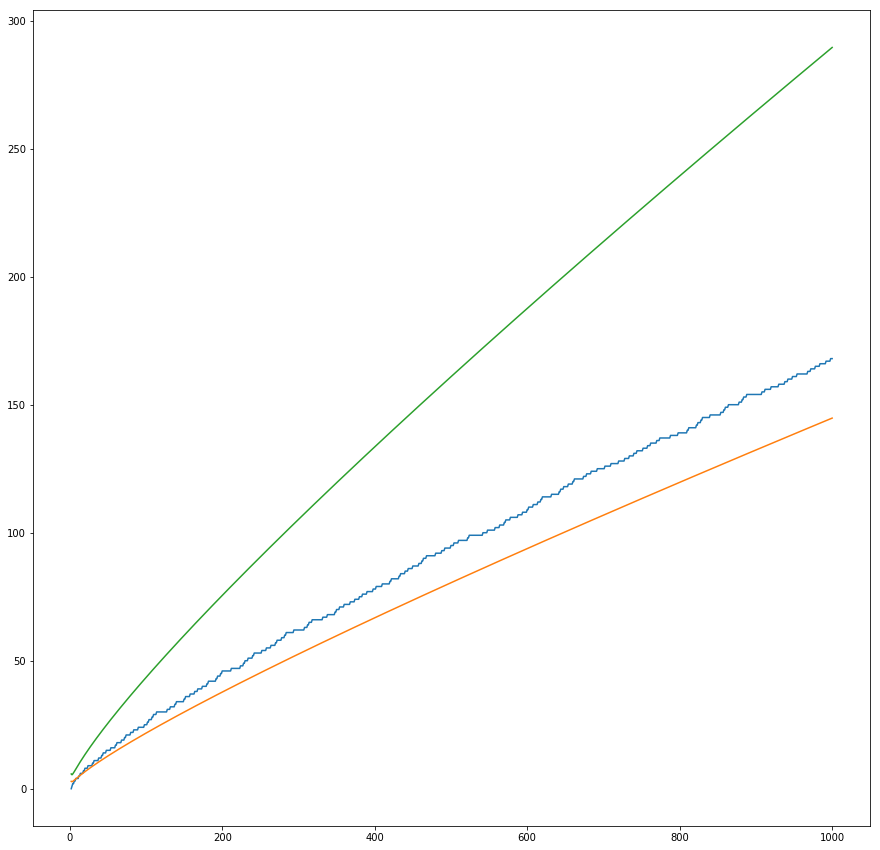

In [34]:
# On trace sur le même graphique Pi(x) et x/log(x) pour x entre 2 et N

fig=plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)

N=1000

c=crible2(N)
x=list(range(2,N+1))
y=[len(c[0:i])-c[0:i].count(0) for i in range(2,N+1)]  #permet de tracer pi(x). On n'utilise pas PiRecursif pour gagner du temps de calcul
z=[i/math.log(i) for i in range(2,N+1)] # on trace x/log(x)
t=[2*i/math.log(i) for i in range(2,N+1)] # on trace 2x/log(x)

plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,t)
plt.show()